# Depth Regression Model for RGBd Image dataset

This project focuses on designing and evaluating a neural network for monocular depth estimation. This involves predicting the distance of objects in an image from the camera using a *single* RGB image. Depth estimation is a crucial task in computer vision, enabling machines to understand the 3D structure of a scene from 2D data. Its applications span across various fields, including:

*   Autonomous driving
*   Augmented reality
*   Robotics

In these areas, accurate depth information is essential for tasks such as navigation, object manipulation, and spatial awareness.

<br>

### Objective

The primary goal is to develop a model capable of accurately predicting depth maps from RGB images, ensuring robust performance across various metrics like:

*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   Mean Absolute Error (MAE)

# Project lead :  Nikhil Shrinivas Ramgiri

This project focuses on designing and evaluating a neural network for monocular depth estimation. This involves predicting the distance of objects in an image from the camera using a single RGB image. Depth estimation is a crucial task in computer vision, enabling machines to understand the 3D structure of a scene from 2D data. Its applications span across various fields, including:

Autonomous driving
Augmented reality
Robotics
In these areas, accurate depth information is essential for tasks such as navigation, object manipulation, and spatial awareness.

Objective
The primary goal is to develop a model capable of accurately predicting depth maps from RGB images, ensuring robust performance across various metrics like:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)

dataset-link
https://www.kaggle.com/code/kmader/showing-the-rgbd-images/notebook


In [1]:
#pip install 'numpy<2'
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from glob import glob
import os
import skimage.filters as flts
from skimage.io import imread # read in images

Data Preprocessing and Visualization

In [2]:
all_pairs = set(map(lambda x: os.path.splitext(x)[0],glob('./3d_scenes/*.*')))
img_dict_fcn = lambda base_path: (base_path,{ext: imread('%s.%s' % (base_path,ext)) for ext in ('tiff','png')})
print(all_pairs)

set()


In [3]:
all_images = list(map(img_dict_fcn,all_pairs))
len(all_images)

0

In [6]:
from glob import glob
from skimage.io import imread

# Example: load TIFF and PNG images from folders
tiff_files = sorted(glob("path_to_tiff_folder/*.tiff"))
png_files = sorted(glob("path_to_png_folder/*.png"))

all_images = []
for tiff_path, png_path in zip(tiff_files, png_files):
    img_dict = {
        "tiff": imread(tiff_path),
        "png": imread(png_path)
    }
    all_images.append(("image_pair", img_dict))


In [ ]:
raw_shape = all_images[0][1]['png'].shape
print(raw_shape)
xx,yy = np.meshgrid(range(raw_shape[1]),range(raw_shape[0]))
# print(xx)
# print(xx, yy)
# flip xx
xx = xx[:,::-1]
# print(xx)
# print(yy)
print(all_images[0][1])

mvertices = np.array([xx[::8,::8].flatten(),
                      yy[::8,::8].flatten(),
                      all_images[0][1]['png'][::8,::8].flatten()])
print(xx.shape,yy.shape,raw_shape,mvertices.shape)

(1404, 2022)
{'tiff': array([[[105, 109, 120, 255],
        [105, 109, 120, 255],
        [106, 110, 121, 255],
        ...,
        [ 97, 111, 122, 255],
        [ 97, 111, 122, 255],
        [ 97, 111, 122, 255]],

       [[105, 109, 120, 255],
        [105, 109, 120, 255],
        [106, 110, 121, 255],
        ...,
        [ 99, 113, 124, 255],
        [ 98, 112, 123, 255],
        [ 98, 112, 123, 255]],

       [[105, 109, 120, 255],
        [105, 109, 120, 255],
        [106, 110, 121, 255],
        ...,
        [100, 114, 125, 255],
        [ 99, 113, 124, 255],
        [ 99, 113, 124, 255]],

       ...,

       [[139, 134, 138, 255],
        [140, 135, 139, 255],
        [141, 136, 140, 255],
        ...,
        [129, 129, 129, 255],
        [129, 129, 129, 255],
        [128, 128, 128, 255]],

       [[139, 134, 138, 255],
        [140, 135, 139, 255],
        [141, 136, 140, 255],
        ...,
        [129, 129, 129, 255],
        [129, 129, 129, 255],
        [128, 128, 128

/tmp/ipykernel_224558/2935239030.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


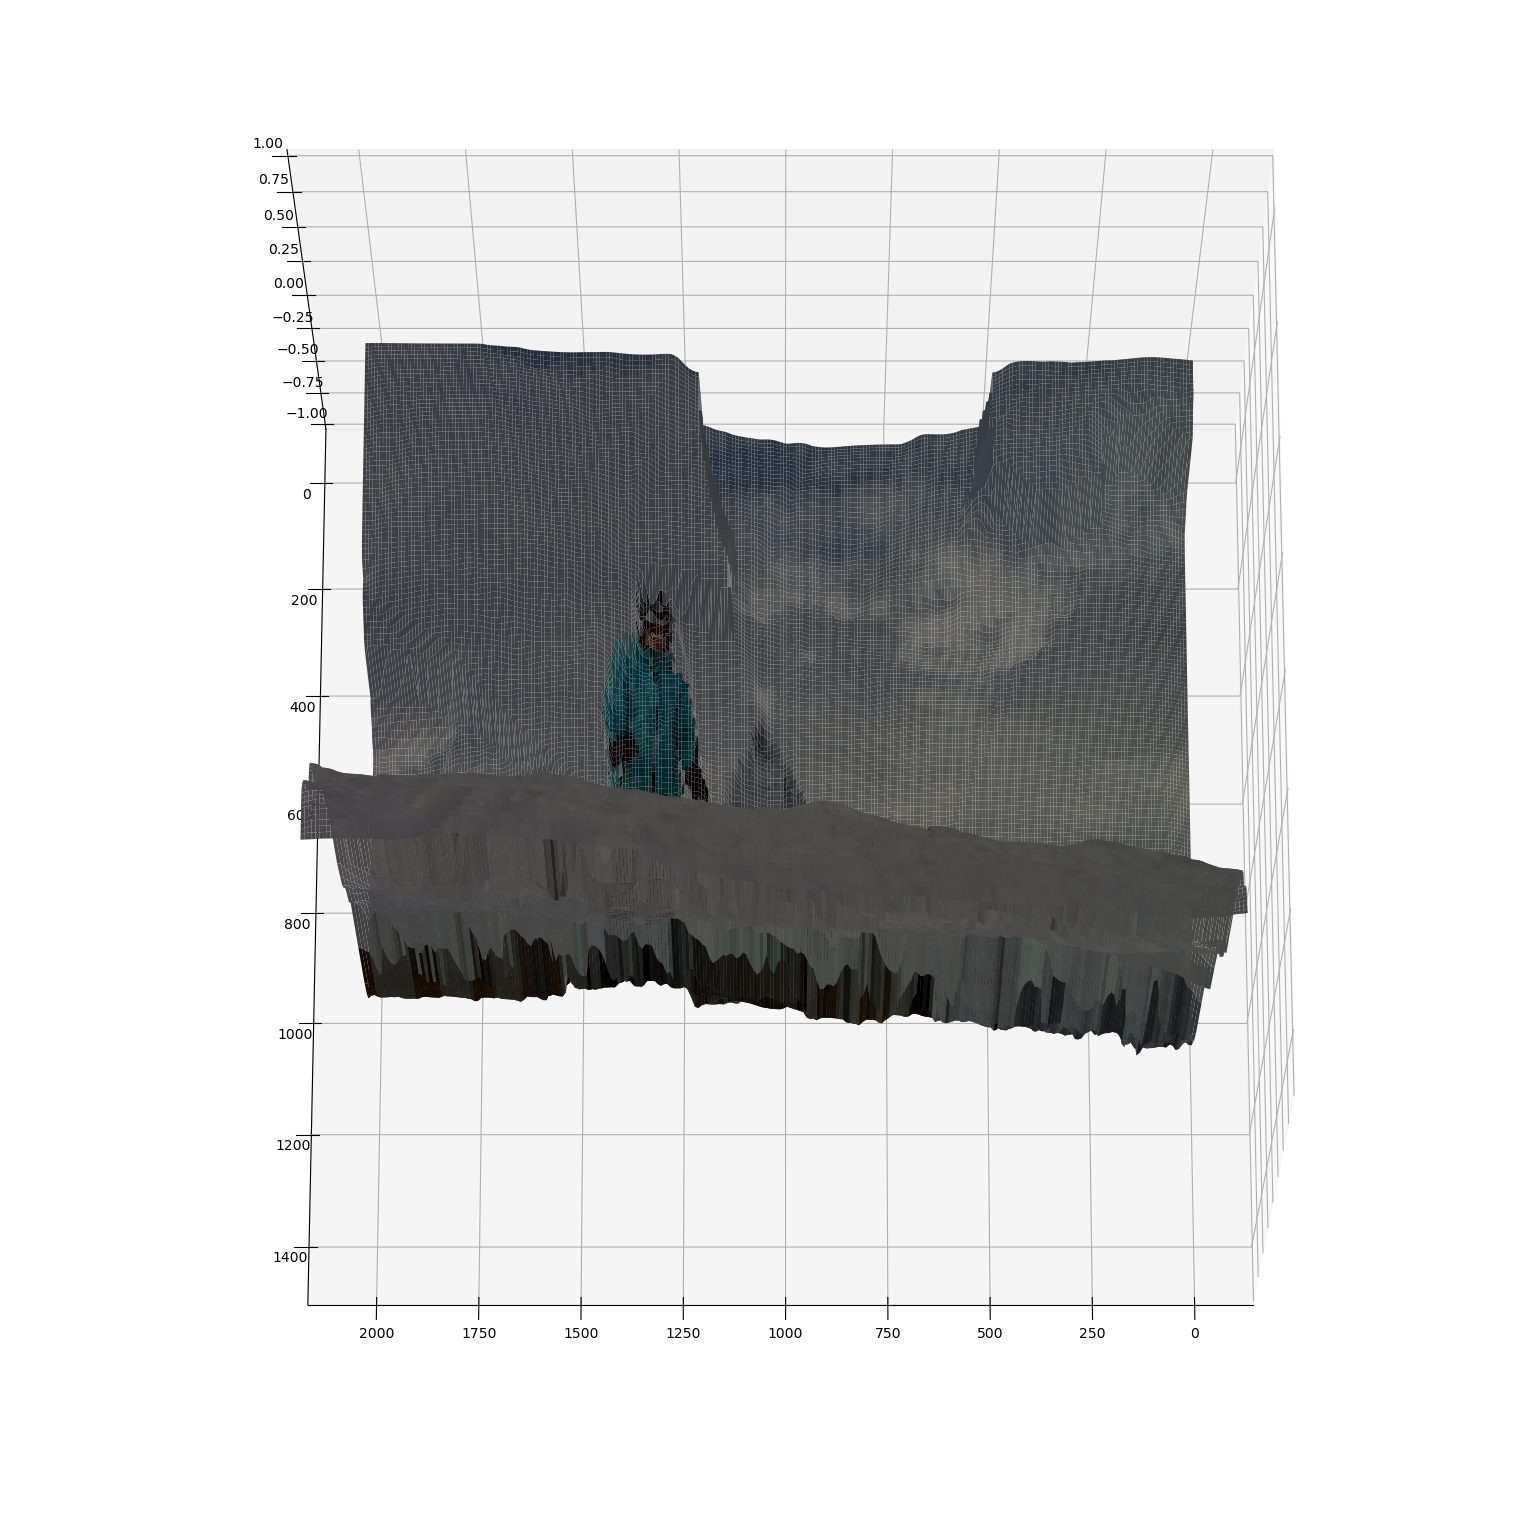

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize = (15,15))
ax = Axes3D(fig)
xx,yy = np.meshgrid(range(raw_shape[1]),range(raw_shape[0]))
# flip xx
xx = xx[:,::-1]
Zdata = all_images[0][1]['png'][::8,::8].astype(np.float32)
Zdata -= Zdata.mean()
Zdata /= -1*Zdata.std()
ax.plot_surface(xx[::8,::8],yy[::8,::8],Zdata, rstride=1, cstride=1, 
                facecolors=all_images[0][1]['tiff'][::8,::8].astype(np.float32)/255,
                linewidth=0, antialiased=True)
ax.set_zlim3d((-1,1))
ax.view_init(70,90)

Meshgrid and 3D Plotting

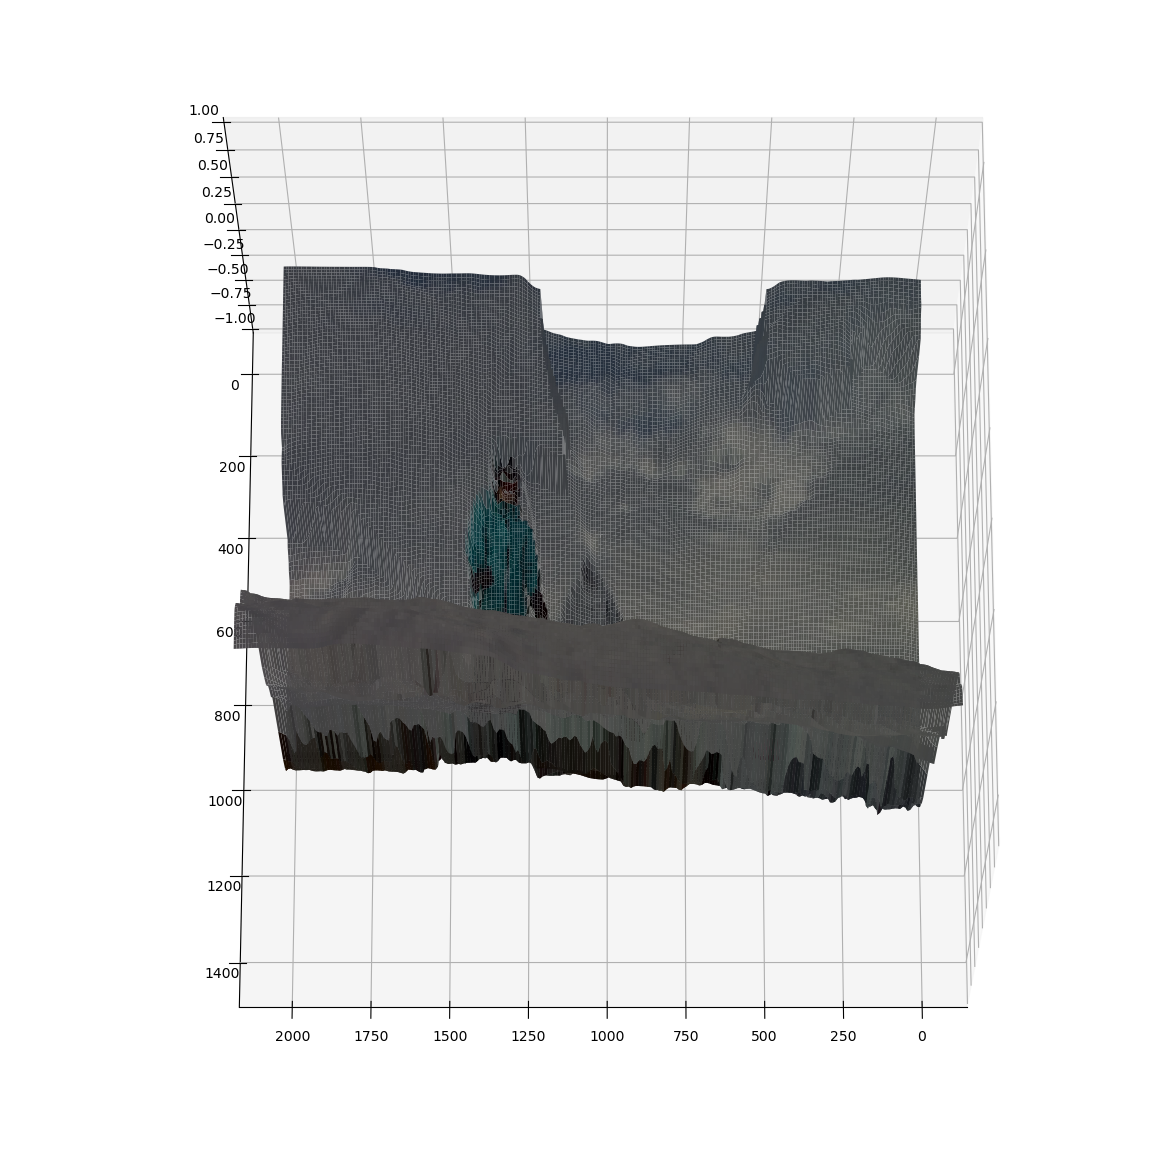

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Ensure 'raw_shape' and 'all_images' are defined
raw_shape = all_images[0][1]['png'].shape

xx, yy = np.meshgrid(range(raw_shape[1]), range(raw_shape[0]))
xx = xx[:, ::-1]

downsample_factor = 8
Zdata = all_images[0][1]['png'][::downsample_factor, ::downsample_factor].astype(np.float32)
Zdata -= Zdata.mean()
Zdata /= -1 * Zdata.std()

facecolors = all_images[0][1]['tiff'][::downsample_factor, ::downsample_factor].astype(np.float32) / 255

# Adjust the shapes if necessary
xx = xx[::downsample_factor, ::downsample_factor]
yy = yy[::downsample_factor, ::downsample_factor]

# Plot the surface
surf = ax.plot_surface(
    xx,
    yy,
    Zdata,
    rstride=1,
    cstride=1,
    facecolors=facecolors,
    linewidth=0,
    antialiased=True
)

ax.set_zlim(-1, 1)
ax.view_init(elev=70, azim=90)

plt.show()

In [ ]:
len(all_images)

7

In [ ]:
BLOCK_SIZE = 128
N_CUT = 16
out_blocks = []
for _,img_dict in all_images:
    for i in range(1,11):
        train_data = img_dict['tiff'][::i,::i]
        lab_data = img_dict['png'][::i,::i]
        print(lab_data.shape)
        def get_rnd_bounds():
            return (np.random.randint(train_data.shape[0]-BLOCK_SIZE),
                    np.random.randint(train_data.shape[1]-BLOCK_SIZE))
        def get_block(in_img,bnds):
            return in_img[bnds[0]:(bnds[0]+BLOCK_SIZE),bnds[1]:(bnds[1]+BLOCK_SIZE)]
        out_blocks += [(get_block(train_data,rwnd),get_block(lab_data,rwnd)) for rwnd in 
                       map(lambda x: get_rnd_bounds(),range(50))]
rgb_blk_stack = np.stack([a for a,b in out_blocks])[:,:,:,:3]
bw_blk_stack = np.stack([b for a,b in out_blocks])
# print(rgb_blk_stack.shape,bw_blk_stack.shape)

(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)
(1404, 2022)
(702, 1011)
(468, 674)
(351, 506)
(281, 405)
(234, 337)
(201, 289)
(176, 253)
(156, 225)
(141, 203)


In [ ]:
rgb_train = rgb_blk_stack.swapaxes(1,3).swapaxes(2,3)
bw_segs = np.expand_dims(bw_blk_stack,1).astype(np.float32)
bw_segs -= bw_segs[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT].mean()
bw_segs /= np.abs(bw_segs[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT]).max()
print(rgb_train.shape,bw_segs.shape)

(3500, 3, 128, 128) (3500, 1, 128, 128)


Preparing Training Blocks

In [ ]:
sc_train, sc_segs = rgb_train, bw_segs
sc_train = sc_train[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT]
sc_segs = sc_segs[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT]

In [ ]:
def show_rgbd_maps(rgb_images, seg_images, count = 3):
    batch_idx = np.array(range(rgb_images.shape[0]))
    np.random.shuffle(batch_idx)
    fig, ax_all = plt.subplots(2, count, figsize = (12,8))
    for pid, (c_raw_ax, c_flt_ax) in zip(batch_idx,ax_all.T):
        c_raw_ax.imshow(rgb_images[pid,:,:,:].swapaxes(0,2).swapaxes(0,1))
        c_raw_ax.set_title("Color Image:{}".format(pid))
        c_raw_ax.axis('off')
        c_flt_ax.imshow(seg_images[pid,0,:,:], cmap='gray', vmin = -1, vmax = 1)
        c_flt_ax.set_title("Depth Image:{}".format(pid))
        c_flt_ax.axis('off')

Visualization of RGB and Depth Maps

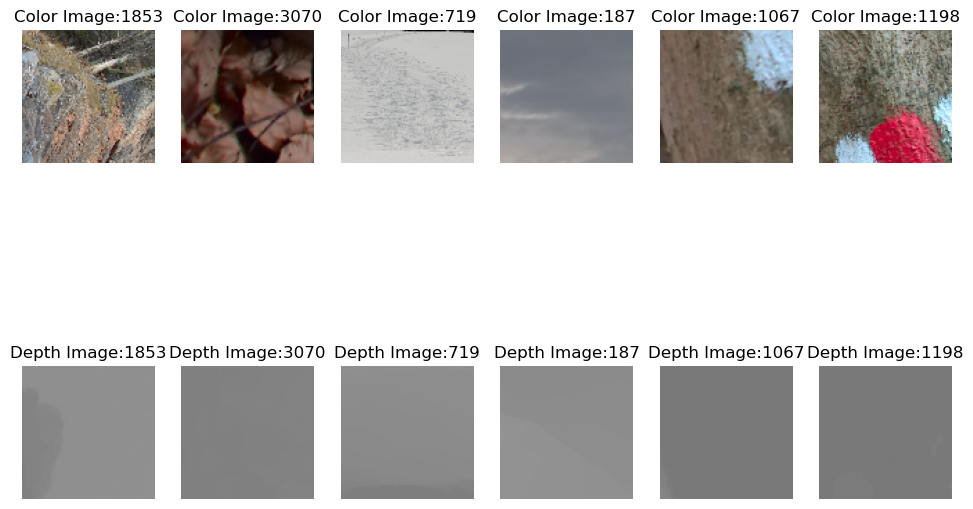

In [ ]:
show_rgbd_maps(sc_train, sc_segs,6)

In [ ]:
np.savez_compressed('depth_training_data.npz', rgb_images = sc_train, depth_maps = sc_segs)

In [ ]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 31.2 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Resizing Images

In [ ]:
import cv2
import numpy as np

# Function to resize images
def resize_images(images, target_size):
    resized_images = []
    for idx, img in enumerate(images):
        C = img.shape[0]  # Number of channels
        img = img.transpose(1, 2, 0)  # Convert to (H, W, C)      
        if C == 1:
            img = img[:, :, 0]  # Convert to (H, W)
        
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        
        if C == 1:
            img_resized = img_resized[np.newaxis, :, :] 
        else:
            img_resized = img_resized.transpose(2, 0, 1) 
        
        resized_images.append(img_resized)
    return np.array(resized_images)


# Resize RGB images and depth maps
target_size = (227, 227)
rgb_images_resized = resize_images(rgb_train, target_size)
depth_maps_resized = resize_images(bw_segs, target_size)

In [ ]:
bw_segs -= bw_segs[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT].mean()
bw_segs /= np.abs(bw_segs[:,:,N_CUT:BLOCK_SIZE-N_CUT,N_CUT:BLOCK_SIZE-N_CUT]).max()

In [ ]:
# Normalized depth maps using mean and standard deviation
depth_maps_mean = depth_maps_resized.mean(axis=(2, 3), keepdims=True)
depth_maps_std = depth_maps_resized.std(axis=(2, 3), keepdims=True)
depth_maps_normalized = (depth_maps_resized - depth_maps_mean) / depth_maps_std

In [ ]:
def inverse_normalize(normalized_depth, mean, std):
    return (normalized_depth * std) + mean

# # During evaluation
# predicted_depth_original = inverse_normalize(predicted_depth, depth_maps_mean, depth_maps_std)
# true_depth_original = inverse_normalize(true_depth, depth_maps_mean, depth_maps_std)

In [ ]:
rgb_images_normalized = rgb_images_resized / 255.0

rgb_mean = rgb_images_resized.mean(axis=(0, 2, 3), keepdims=True)
rgb_std = rgb_images_resized.std(axis=(0, 2, 3), keepdims=True)
rgb_images_normalized = (rgb_images_resized - rgb_mean) / rgb_std

Computing Depth Gradients

In [ ]:
import torch
import torch.nn.functional as F

def compute_depth_gradients(depth_maps):
    # Convert numpy array to torch tensor
    depth_maps_tensor = torch.tensor(depth_maps_normalized, dtype=torch.float32)

    # Define Sobel filters for x and y gradients
    sobel_x = torch.tensor([[[[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]]]], dtype=torch.float32)
    sobel_y = torch.tensor([[[[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]]]], dtype=torch.float32)

    # Apply convolution to compute gradients
    gradient_x = F.conv2d(depth_maps_tensor, sobel_x, padding=1)
    gradient_y = F.conv2d(depth_maps_tensor, sobel_y, padding=1)

    # Concatenate gradients along channel dimension
    depth_gradients = torch.cat((gradient_x, gradient_y), dim=1)

    # Convert back to numpy array
    depth_gradients = depth_gradients.numpy()
    return depth_gradients

# Compute depth gradients
depth_gradients = compute_depth_gradients(depth_maps_normalized)

In [ ]:
#pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/2a/ef/834af4a885b31a0b32fff2d80e1e40f771e1566ea8ded55347502440786a/torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/c6/b2/454d6e7f0158951d8a78c2e1eb4f69ae81beb8dca5fee9809c6c99e9d0d0/fsspec-2024.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.4.127 from https://files.pythonhosted.org/packages/2c/14/91ae57cd4db3f9ef7aa99f4019cfa8d54cb4caa7e00975df6467e9725a9f/nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.4.127 from https://files.pythonhosted.org/packages/ea/27/1795d86fe88ef397885f2e580ac37628ed058a92ed2c39dc8eac3adf0619/nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
data = np.load('depth_training_data.npz')
rgb_images = data['rgb_images']      # Shape: (3500, 3, 96, 96)
depth_maps = data['depth_maps']      # Shape: (3500, 1, 96, 96)

# 2. Train-Test Split
split = int(0.8 * rgb_images.shape[0])
train_rgb, test_rgb = rgb_images[:split], rgb_images[split:]
train_depth, test_depth = depth_maps[:split], depth_maps[split:]

print(f"Depth Maps Shape: {depth_maps.shape}")
print(f"Depth Maps Data Type: {depth_maps.dtype}")
print(f"Depth Maps Range: min={depth_maps.min()}, max={depth_maps.max()}")

Depth Maps Shape: (3500, 1, 96, 96)
Depth Maps Data Type: float32
Depth Maps Range: min=-1.0, max=0.20489193499088287


Defining the Depth Dataset

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset
import torch.nn as nn

class DepthDataset(Dataset):
    def __init__(self, rgb_images, depth_maps, augment=False):
        """
        Args:
            rgb_images (numpy.ndarray): Array of RGB images with shape (N, 3, H, W).
            depth_maps (numpy.ndarray): Array of depth maps with shape (N, 1, H, W).
            augment (bool): Whether to apply data augmentation.
        """
        self.rgb_images = rgb_images
        self.depth_maps = depth_maps
        self.augment = augment

    def __len__(self):
        return len(self.rgb_images)

    def __getitem__(self, idx):
        rgb = self.rgb_images[idx]
        depth = self.depth_maps[idx]

        # Convert to float tensors
        rgb = torch.from_numpy(rgb).float()
        depth = torch.from_numpy(depth).float()

        # Normalize RGB to [0,1]
        rgb = rgb / 255.0

        # Resize to 256x256 using torch's interpolate
        rgb = nn.functional.interpolate(rgb.unsqueeze(0), size=(256, 256), mode='bilinear', align_corners=False).squeeze(0)
        depth = nn.functional.interpolate(depth.unsqueeze(0), size=(256, 256), mode='nearest').squeeze(0)

        if self.augment:
            if torch.rand(1).item() > 0.5:
                rgb = TF.hflip(rgb)
                depth = TF.hflip(depth)

            angle = random.uniform(-10, 10)
            rgb = TF.rotate(rgb, angle, interpolation=TF.InterpolationMode.BILINEAR)
            depth = TF.rotate(depth, angle, interpolation=TF.InterpolationMode.NEAREST)

            # Color jitter on RGB only
            color_jitter = transforms.ColorJitter(
                brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
            rgb = color_jitter(rgb)

            # Random crop
            i, j, h, w = transforms.RandomCrop.get_params(
                rgb, output_size=(227, 227))
            rgb = TF.crop(rgb, i, j, h, w)
            depth = TF.crop(depth, i, j, h, w)
        else:
            # Center crop
            rgb = TF.center_crop(rgb, (227, 227))
            depth = TF.center_crop(depth, (227, 227))

        return rgb, depth

In [ ]:
# Corrected training and validation dataset creation
from torch.utils.data import DataLoader

train_dataset = DepthDataset(train_rgb, train_depth,augment = True)   # Augmentation for training data
val_dataset = DepthDataset(test_rgb, test_depth, augment=False)      # No augmentation for validation data

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
for idx in range(5):
    rgb_sample, depth_sample = train_dataset[idx]
    print(f"Sample {idx}: RGB shape: {rgb_sample.shape}, Depth shape: {depth_sample.shape}")

Sample 0: RGB shape: torch.Size([3, 227, 227]), Depth shape: torch.Size([1, 227, 227])
Sample 1: RGB shape: torch.Size([3, 227, 227]), Depth shape: torch.Size([1, 227, 227])
Sample 2: RGB shape: torch.Size([3, 227, 227]), Depth shape: torch.Size([1, 227, 227])
Sample 3: RGB shape: torch.Size([3, 227, 227]), Depth shape: torch.Size([1, 227, 227])
Sample 4: RGB shape: torch.Size([3, 227, 227]), Depth shape: torch.Size([1, 227, 227])


In [ ]:
def normalized_euclidean_loss(predicted_depth, true_depth):
    if predicted_depth.shape != true_depth.shape:
        print(f"Shape mismatch: predicted_depth {predicted_depth.shape}, true_depth {true_depth.shape}")
    diff = predicted_depth - true_depth
    loss = torch.sqrt(torch.mean(diff ** 2))
    return loss

In [ ]:
# For Global Depth Network (Depth Estimation)
from torch.utils.data import DataLoader

train_dataset_global = DepthDataset(rgb_images_normalized, depth_maps_normalized, augment=True)
train_loader_global = DataLoader(train_dataset_global, batch_size=16, shuffle=True)

# For Local Gradient Network (Gradient Estimation)
train_dataset_local = DepthDataset(rgb_images_normalized, depth_gradients, augment=True)
train_loader_local = DataLoader(train_dataset_local, batch_size=16, shuffle=True)

# For Depth Refinement Network
train_dataset_refine = DepthDataset(rgb_images_normalized, depth_maps_normalized, augment=True)
train_loader_refine = DataLoader(train_dataset_refine, batch_size=16, shuffle=True)

In [ ]:
# Function to calculate the output size after convolution and pooling layers
def calculate_conv_output_size(input_size, kernel_size, stride=1, padding=0):
    return (input_size - kernel_size + 2 * padding) // stride + 1

input_size = 227
kernel_size = 11
stride = 4
padding = 2
output_size = calculate_conv_output_size(input_size, kernel_size, stride, padding)
print(f"Output size after first conv layer: {output_size}")

Output size after first conv layer: 56


In [ ]:
class GlobalDepthNetwork(nn.Module):
    def __init__(self):
        super(GlobalDepthNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),  # Conv1
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # Pool1
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), # Conv2
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # Pool2
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),# Conv3
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),# Conv4
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),# Conv5
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)                   # Pool3
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 6x6 -> 12x12
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # 12x12 -> 24x24
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # 24x24 -> 48x48
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(32, 16, kernel_size=5, stride=3, padding=1),    # 48x48 -> 145x145
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(16, 1, kernel_size=5, stride=1, padding=0),     # 145x145 -> 149x149
            nn.Upsample(size=(227, 227), mode='bilinear', align_corners=False)  # Upsample to 227x227
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

In [ ]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
global_depth_net = GlobalDepthNetwork().to(device)
global_depth_net.apply(weights_init)
optimizer_global = torch.optim.Adam(global_depth_net.parameters(), lr=1e-4)

num_epochs = 10
for epoch in range(num_epochs):
    global_depth_net.train()
    epoch_loss = 0
    for rgb, depth in train_loader:
        rgb = rgb.to(device).float()
        depth = depth.to(device).float()
        optimizer_global.zero_grad()
        depth_pred = global_depth_net(rgb)
        loss = normalized_euclidean_loss(depth_pred, depth)
        loss.backward()
        optimizer_global.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

Epoch 1/10, Average Loss: 0.1450
Epoch 2/10, Average Loss: 0.1094
Epoch 3/10, Average Loss: 0.0935
Epoch 4/10, Average Loss: 0.0816
Epoch 5/10, Average Loss: 0.0755
Epoch 6/10, Average Loss: 0.0714
Epoch 7/10, Average Loss: 0.0675
Epoch 8/10, Average Loss: 0.0659
Epoch 9/10, Average Loss: 0.0636
Epoch 10/10, Average Loss: 0.0640


In [ ]:
class LocalDepthGradientNetwork(nn.Module):
    def __init__(self):
        super(LocalDepthGradientNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),  # Conv1
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # Pool1
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), # Conv2
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # Pool2
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),# Conv3
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),# Conv4
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),# Conv5
            nn.ReLU(inplace=True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # Upsample to 26x26
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # Upsample to 52x52
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # Upsample to 104x104
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),    # Upsample to 208x208
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(16, 2, kernel_size=4, stride=2, padding=1),     # Upsample to 416x416
            nn.Conv2d(2, 2, kernel_size=3, padding=1),                         # Maintain at 416x416
            nn.Upsample(size=(227, 227), mode='bilinear', align_corners=False)  # Final resize
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = F.interpolate(x, size=(227, 227), mode='bilinear', align_corners=False)
        return x 

In [ ]:
import torch

def compute_depth_gradients(depth):
    """   
    Args:
        depth (torch.Tensor): Tensor of shape [batch_size, 1, H, W]
    
    Returns:
        torch.Tensor: Gradients along x and y axes, shape [batch_size, 2, H, W]
    """
    # Define Sobel kernels for x and y gradients
    sobel_x = torch.tensor([[[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]]], dtype=depth.dtype, device=depth.device).unsqueeze(0)  # Shape: [1,1,3,3]
    
    sobel_y = torch.tensor([[[-1, -2, -1],
                             [ 0,  0,  0],
                             [ 1,  2,  1]]], dtype=depth.dtype, device=depth.device).unsqueeze(0)  # Shape: [1,1,3,3]
    
    # Convolve depth with Sobel kernels
    grad_x = F.conv2d(depth, sobel_x, padding=1)  # Shape: [batch_size,1,227,227]
    grad_y = F.conv2d(depth, sobel_y, padding=1)  # Shape: [batch_size,1,227,227]
    
    gradients = torch.cat([grad_x, grad_y], dim=1)
    
    return gradients

In [ ]:
def gradient_loss(predicted_gradients, true_gradients):
    loss = F.l1_loss(predicted_gradients, true_gradients)
    return loss

In [ ]:
local_gradient_net = LocalDepthGradientNetwork().to(device)
local_gradient_net.apply(weights_init)
optimizer_local = torch.optim.Adam(local_gradient_net.parameters(), lr=1e-4)

# Training loop for Local Depth Gradient Network
num_epochs = 10
for epoch in range(num_epochs):
    local_gradient_net.train()
    epoch_loss = 0
    for rgb, depth in train_loader:
        rgb = rgb.to(device).float()
        depth = depth.to(device).float()
        optimizer_local.zero_grad()
        predicted_gradients = local_gradient_net(rgb)
        true_gradients = compute_depth_gradients(depth)
        loss = gradient_loss(predicted_gradients, true_gradients)
        loss.backward()
        optimizer_local.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Gradient Loss: {avg_loss:.4f}")

Epoch 1/10, Average Gradient Loss: 0.0487
Epoch 2/10, Average Gradient Loss: 0.0195
Epoch 3/10, Average Gradient Loss: 0.0106
Epoch 4/10, Average Gradient Loss: 0.0094
Epoch 5/10, Average Gradient Loss: 0.0092
Epoch 6/10, Average Gradient Loss: 0.0091
Epoch 7/10, Average Gradient Loss: 0.0091
Epoch 8/10, Average Gradient Loss: 0.0090
Epoch 9/10, Average Gradient Loss: 0.0090
Epoch 10/10, Average Gradient Loss: 0.0089


In [ ]:
def integrate_gradients(gradients):
    grad_x = gradients[:, 0, :, :]
    grad_y = gradients[:, 1, :, :]
    # Integrate along x-axis
    depth_x = torch.cumsum(grad_x, dim=2)
    # Integrate along y-axis
    depth_xy = torch.cumsum(grad_y, dim=1)
    # Combine both
    integrated_depth = depth_x + depth_xy
    integrated_depth = integrated_depth.unsqueeze(1)  # Shape: (batch_size, 1, H, W)
    return integrated_depth

In [ ]:
class DepthEstimationNetwork(nn.Module):
    def __init__(self):
        super(DepthEstimationNetwork, self).__init__()
        self.global_net = GlobalDepthNetwork()
        self.local_net = LocalDepthGradientNetwork()
        self.fusion = nn.Sequential(
            nn.Conv2d(5, 1, kernel_size=1)
        )

    def forward(self, x):
        global_depth = self.global_net(x)         # Shape: (batch_size, 1, H, W)
        local_gradients = self.local_net(x)       # Shape: (batch_size, 2, H, W)
        # Integrate local gradients to approximate depth
        integrated_local_depth = integrate_gradients(local_gradients)  # Shape: (batch_size, 1, H, W)
        combined_input = torch.cat((global_depth, integrated_local_depth, x), dim=1)  # Shape: (batch_size, 5, H, W)
        combined_depth = self.fusion(combined_input)  # Shape: (batch_size, 1, H, W)
        return combined_depth, local_gradients


In [ ]:
import torch.nn as nn

def total_loss(predicted_depth, true_depth, predicted_gradients, true_gradients, lambda_grad=0.5):
    depth_loss = nn.MSELoss()(predicted_depth, true_depth)
    grad_loss = nn.L1Loss()(predicted_gradients, true_gradients)
    return depth_loss + lambda_grad * grad_loss

In [ ]:
#pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/50/79/d21599fc44d2d497ced440480670b6314ebc00308e3bae0d0ebca44cd481/scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 8.3/13.5 MB 79.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, dataloader, device, mean, std):
    model.eval()
    all_true = []
    all_pred = []
    
    with torch.no_grad():
        for rgb, depth in dataloader:
            rgb = rgb.to(device).float()
            depth = depth.to(device).float()
            
            predicted_depth, _ = model(rgb)

            # calculating mean and standard deviation of depth maps for current batch
            depth_mean = depth.mean(axis=(2,3), keepdims = True)
            depth_std = depth.std(axis = (2,3), keepdims=True)
            
            # Inversing normalize depth maps before moving to cpu and numpy
            predicted_depth = (predicted_depth * depth_std) + depth_mean
            true_depth = (depth * depth_std) + depth_mean
            
            all_true.append(true_depth.cpu().numpy())
            all_pred.append(predicted_depth.cpu().numpy())
    
    all_true = np.concatenate(all_true, axis=0).flatten()
    all_pred = np.concatenate(all_pred, axis=0).flatten()
    
    mse = mean_squared_error(all_true, all_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(all_true, all_pred)
    
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return mse, rmse, mae

In [ ]:
train_losses = []
val_losses = []
train_mse = []
val_mse = []
train_mae = []
val_mae = []
train_r2 = []
val_r2 = []

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the combined network
depth_estimation_net = DepthEstimationNetwork().to(device)
depth_estimation_net.apply(weights_init)

# Adjust optimizer to include weight decay
optimizer = optim.Adam(depth_estimation_net.parameters(), lr=1e-4, weight_decay=1e-5)

# Use a learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

patience = 3
best_val_loss = float('inf')
epochs_no_improve = 0

# Set lambda_grad
lambda_grad = 0.3

# Number of epochs
num_epochs = 20

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for epoch in range(num_epochs):
    # Training phase
    depth_estimation_net.train()
    train_loss = 0
    train_preds = []
    train_trues = []
    for rgb, depth in train_loader:
        rgb = rgb.to(device).float()
        depth = depth.to(device).float()
        optimizer.zero_grad()
        predicted_depth, predicted_gradients = depth_estimation_net(rgb)
        true_gradients = compute_depth_gradients(depth)
        loss = total_loss(predicted_depth, depth, predicted_gradients, true_gradients, lambda_grad)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        # Accumulate predictions and true values for metrics
        train_preds.append(predicted_depth.detach().cpu().numpy())
        train_trues.append(depth.detach().cpu().numpy())
    
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Compute training metrics
    train_preds_np = np.concatenate(train_preds, axis=0).flatten()
    train_trues_np = np.concatenate(train_trues, axis=0).flatten()
    train_mse_val = mean_squared_error(train_trues_np, train_preds_np)
    train_mae_val = mean_absolute_error(train_trues_np, train_preds_np)
    train_r2_val = r2_score(train_trues_np, train_preds_np)
    train_mse.append(train_mse_val)
    train_mae.append(train_mae_val)
    train_r2.append(train_r2_val)
    
    # Validation phase
    depth_estimation_net.eval()
    val_loss = 0
    val_preds = []
    val_trues = []
    with torch.no_grad():
        for rgb, depth in val_loader:
            rgb = rgb.to(device).float()
            depth = depth.to(device).float()
            predicted_depth, predicted_gradients = depth_estimation_net(rgb)
            true_gradients = compute_depth_gradients(depth)
            loss = total_loss(predicted_depth, depth, predicted_gradients, true_gradients, lambda_grad)
            val_loss += loss.item()
            
            # Accumulate predictions and true values for metrics
            val_preds.append(predicted_depth.cpu().numpy())
            val_trues.append(depth.cpu().numpy())
    
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    val_preds_np = np.concatenate(val_preds, axis=0).flatten()
    val_trues_np = np.concatenate(val_trues, axis=0).flatten()
    val_mse_val = mean_squared_error(val_trues_np, val_preds_np)
    val_mae_val = mean_absolute_error(val_trues_np, val_preds_np)
    val_r2_val = r2_score(val_trues_np, val_preds_np)
    val_mse.append(val_mse_val)
    val_mae.append(val_mae_val)
    val_r2.append(val_r2_val)
    
    # Print losses and metrics
    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
          f"Train MSE: {train_mse_val:.4f}, Val MSE: {val_mse_val:.4f}, "
          f"Train MAE: {train_mae_val:.4f}, Val MAE: {val_mae_val:.4f}, "
          f"Train R2: {train_r2_val:.4f}, Val R2: {val_r2_val:.4f}")
    
    # Learning rate scheduler step
    scheduler.step(avg_val_loss)
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(depth_estimation_net.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            break


/common/home/mnm131/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/20, Training Loss: 9.7256, Validation Loss: 0.4992, Train MSE: 9.7157, Val MSE: 0.4916, Train MAE: 1.6221, Val MAE: 0.5258, Train R2: -391.2408, Val R2: -27.5456
Epoch 2/20, Training Loss: 0.2407, Validation Loss: 0.2185, Train MSE: 0.2312, Val MSE: 0.2111, Train MAE: 0.3396, Val MAE: 0.3455, Train R2: -8.3668, Val R2: -11.2558
Epoch 3/20, Training Loss: 0.1132, Validation Loss: 0.1349, Train MSE: 0.1043, Val MSE: 0.1277, Train MAE: 0.2295, Val MAE: 0.2691, Train R2: -3.2397, Val R2: -6.4125
Epoch 4/20, Training Loss: 0.0753, Validation Loss: 0.0900, Train MSE: 0.0668, Val MSE: 0.0828, Train MAE: 0.1864, Val MAE: 0.2138, Train R2: -1.7081, Val R2: -3.8087
Epoch 5/20, Training Loss: 0.0517, Validation Loss: 0.0627, Train MSE: 0.0441, Val MSE: 0.0559, Train MAE: 0.1544, Val MAE: 0.1779, Train R2: -0.7856, Val R2: -2.2440
Epoch 6/20, Training Loss: 0.0379, Validation Loss: 0.0546, Train MSE: 0.0309, Val MSE: 0.0484, Train MAE: 0.1316, Val MAE: 0.1657, Train R2: -0.2533, Val R2: -1



# Check the depth range in the validation set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

check_depth_range(train_loader, device, num_batches=5)


/tmp/ipykernel_224558/1231574860.py:123: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  depth_estimation_net.load_state_dict(torch.load('best_model.pth', map_location=device)

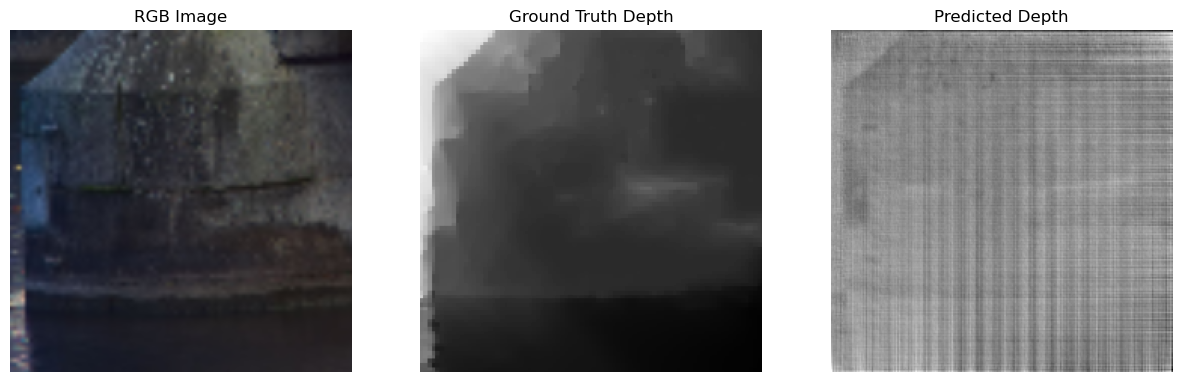

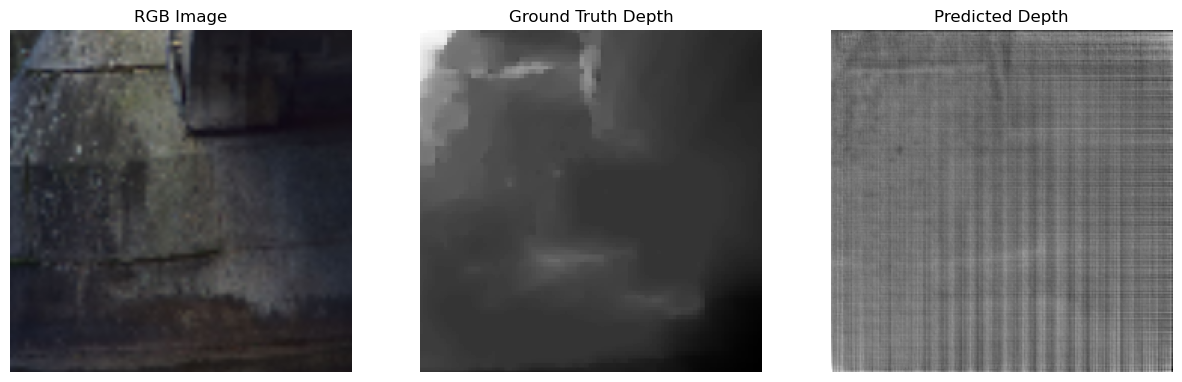

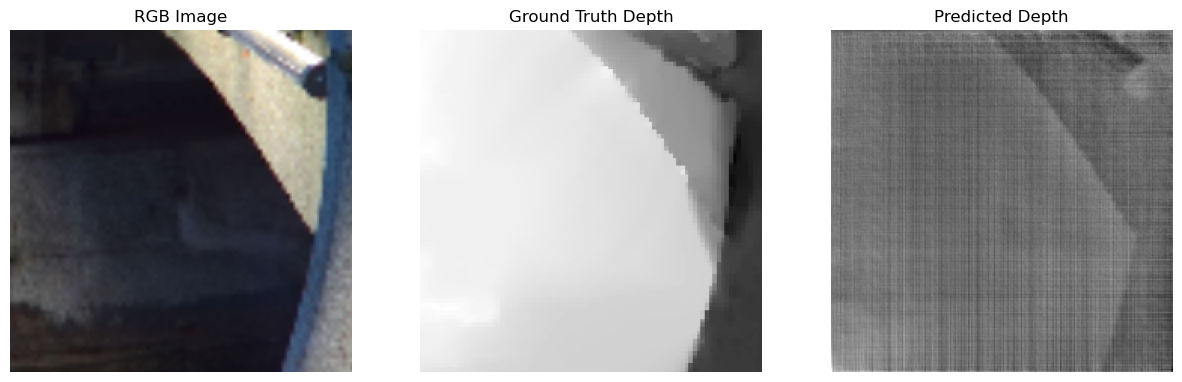

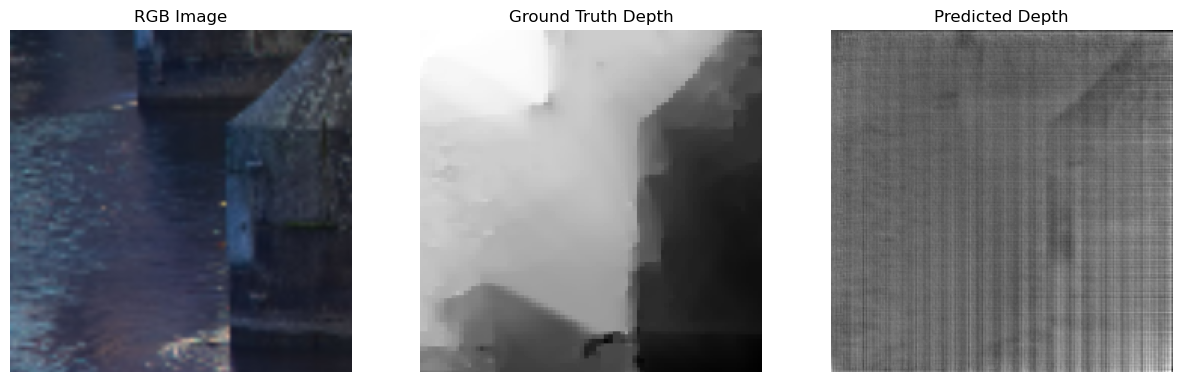

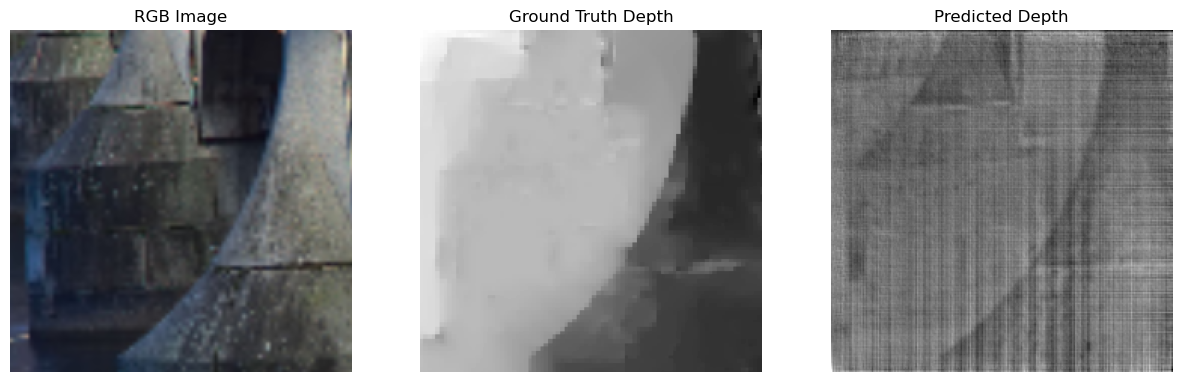

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader

import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader

def visualize_predictions(model, dataloader, device, num_samples=5):
    """
    Visualizes the RGB image, ground truth depth map, and predicted depth map.

    Args:
        model (nn.Module): Trained depth estimation model.
        dataloader (DataLoader): DataLoader for the dataset.
        device (torch.device): Device to run the model on.
        num_samples (int): Number of samples to visualize.
    """
    model.eval()  # Set model to evaluation mode
    to_pil = ToPILImage()

    # Select a batch from the dataloader
    with torch.no_grad():
        for batch_idx, (rgb, depth) in enumerate(dataloader):
            rgb = rgb.to(device).float()
            depth = depth.to(device).float()

            # Get model predictions
            predicted_depth, _ = model(rgb)

            # Move tensors to CPU and convert to NumPy
            rgb_np = rgb.cpu().numpy()
            depth_np = depth.cpu().numpy()
            predicted_depth_np = predicted_depth.cpu().numpy()

            # Iterate over the batch
            for i in range(min(num_samples, rgb_np.shape[0])):
                fig, axs = plt.subplots(1, 3, figsize=(15, 5))

                # Display RGB Image
                axs[0].imshow(np.transpose(rgb_np[i], (1, 2, 0)))
                axs[0].set_title('RGB Image')
                axs[0].axis('off')

                # Display Ground Truth Depth Map
                axs[1].imshow(depth_np[i,0],cmap='gray')
                axs[1].set_title('Ground Truth Depth')
                axs[1].axis('off')

                # Display Predicted Depth Map
                axs[2].imshow(predicted_depth_np[i][0], cmap='gray')
                axs[2].set_title('Predicted Depth')
                axs[2].axis('off')

                plt.show()

            break

# Loading the best model
depth_estimation_net = DepthEstimationNetwork().to(device)
depth_estimation_net.load_state_dict(torch.load('best_model.pth', map_location=device))
depth_estimation_net.eval()

# Visualizing predictions on the validation set
visualize_predictions(depth_estimation_net, val_loader, device, num_samples=5)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def percentage_within_threshold(true_depth, predicted_depth, threshold=1.25):
    absolute_ratio = np.abs(true_depth - predicted_depth) / np.abs(true_depth)

    return np.mean(absolute_ratio < threshold)


def evaluate_depth_model(model, dataloader, device):
    """
    Evaluate the depth estimation model on various metrics.

    Args:
        model (nn.Module): Depth estimation model to evaluate
        dataloader (torch.utils.data.DataLoader): Validation or test dataloader
        device (torch.device): Device to run the model on

    Returns:
        dict: Dictionary containing evaluation metrics
    """
    model.eval()

    true_depths = []
    predicted_depths = []

    # Disable gradient computation for inference
    with torch.no_grad():
        for rgb, depth in dataloader:
            rgb = rgb.to(device).float()
            depth = depth.to(device).float()

            # Get model predictions
            predicted_depth, _ = model(rgb)

            # calculating mean and standard deviation of depth maps for current batch
            depth_mean = depth.mean(axis=(2,3), keepdims = True)
            depth_std = depth.std(axis = (2,3), keepdims=True)
            
            # Inversing normalize depth maps before moving to cpu and numpy
            predicted_depth = (predicted_depth * depth_std) + depth_mean
            true_depth = (depth * depth_std) + depth_mean

            true_depth_np = true_depth.cpu().numpy()
            predicted_depth_np = predicted_depth.cpu().numpy()
            
            # Appending to lists (flatten the arrays)
            true_depths.extend(true_depth_np.flatten())
            predicted_depths.extend(predicted_depth_np.flatten())

    true_depths = np.array(true_depths)
    predicted_depths = np.array(predicted_depths)

    # Metrics
    mse = mean_squared_error(true_depths, predicted_depths)
    mae = mean_absolute_error(true_depths, predicted_depths)


    rmse = np.sqrt(mse)

    r2 = r2_score(true_depths, predicted_depths)

    pct_within_threshold = percentage_within_threshold(true_depths, predicted_depths)

    evaluation_results = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2,
        'Percentage Within Threshold (1.25)': pct_within_threshold,
    }

    return evaluation_results, true_depths, predicted_depths


best_model = DepthEstimationNetwork().to(device)
best_model.load_state_dict(torch.load('best_model.pth', map_location=device))
best_model.eval()

evaluation_metrics, true_depths, predicted_depths = evaluate_depth_model(best_model, val_loader, device)

print("Model Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

/tmp/ipykernel_224558/146820397.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('best_model.pth', map_location=device))


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0003
Root Mean Squared Error (RMSE): 0.0168
Mean Absolute Error (MAE): 0.0064
R-squared (R2): 0.9813
Percentage Within Threshold (1.25): 0.9831


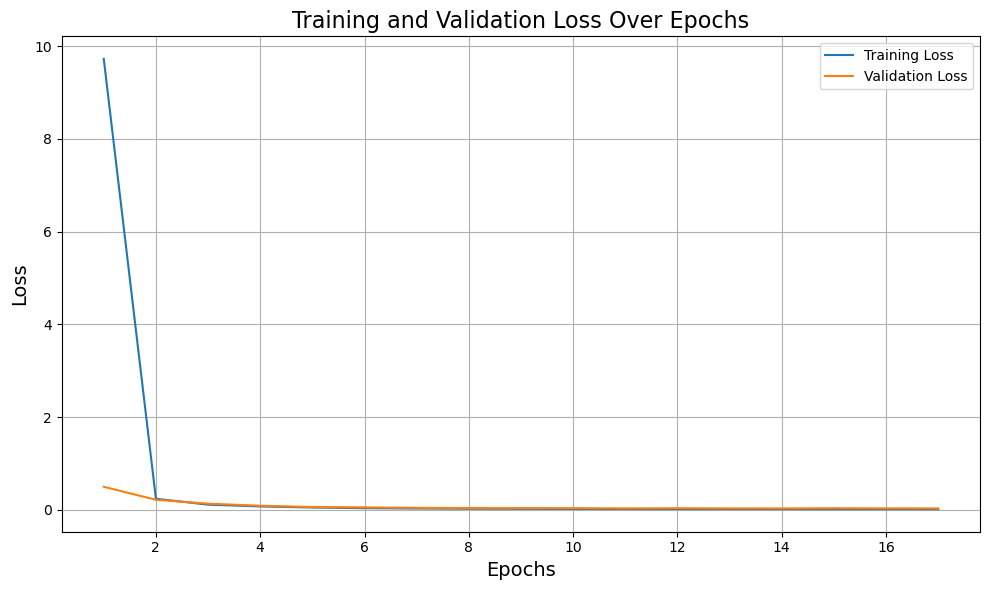

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

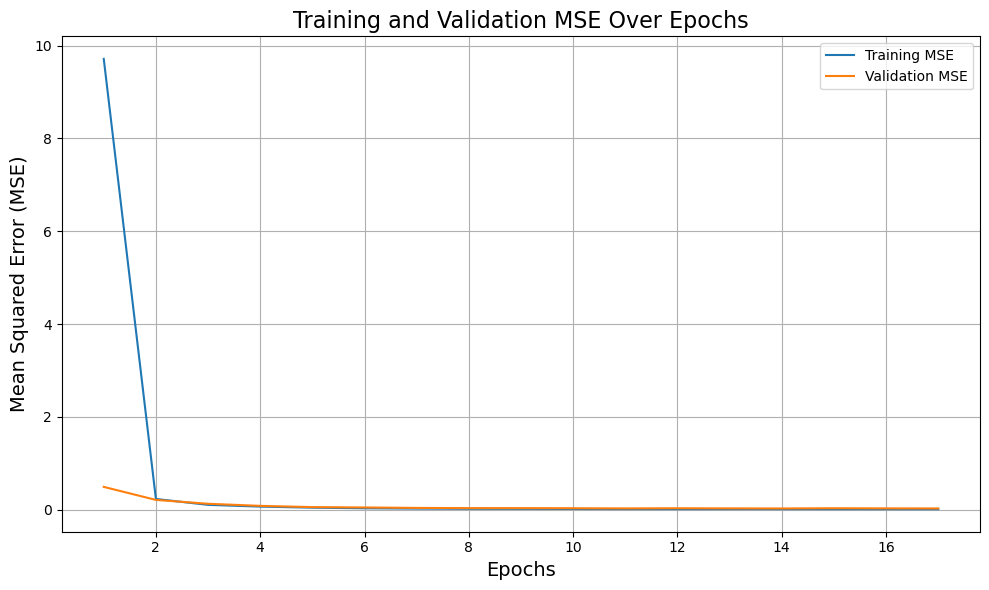

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_mse)+1), train_mse, label='Training MSE')
plt.plot(range(1, len(val_mse)+1), val_mse, label='Validation MSE')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Training and Validation MSE Over Epochs', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

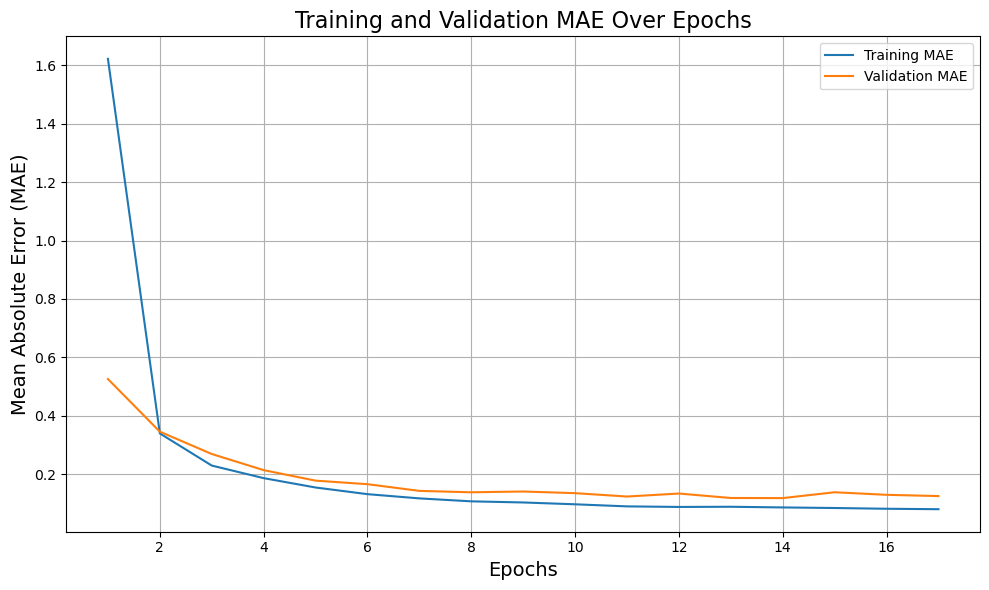

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_mae)+1), train_mae, label='Training MAE')
plt.plot(range(1, len(val_mae)+1), val_mae, label='Validation MAE')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.title('Training and Validation MAE Over Epochs', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

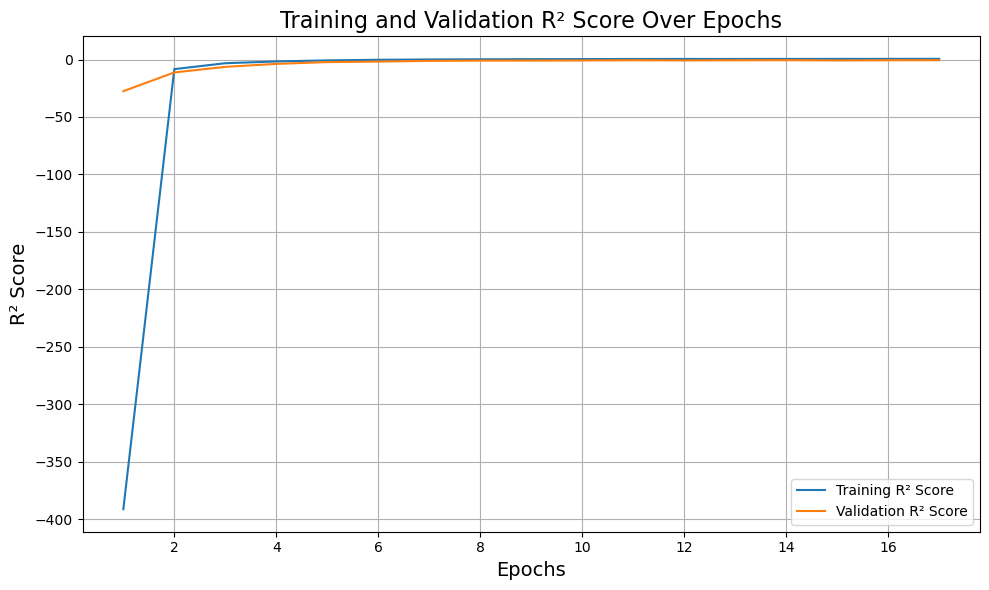

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_r2)+1), train_r2, label='Training R² Score')
plt.plot(range(1, len(val_r2)+1), val_r2, label='Validation R² Score')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.title('Training and Validation R² Score Over Epochs', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

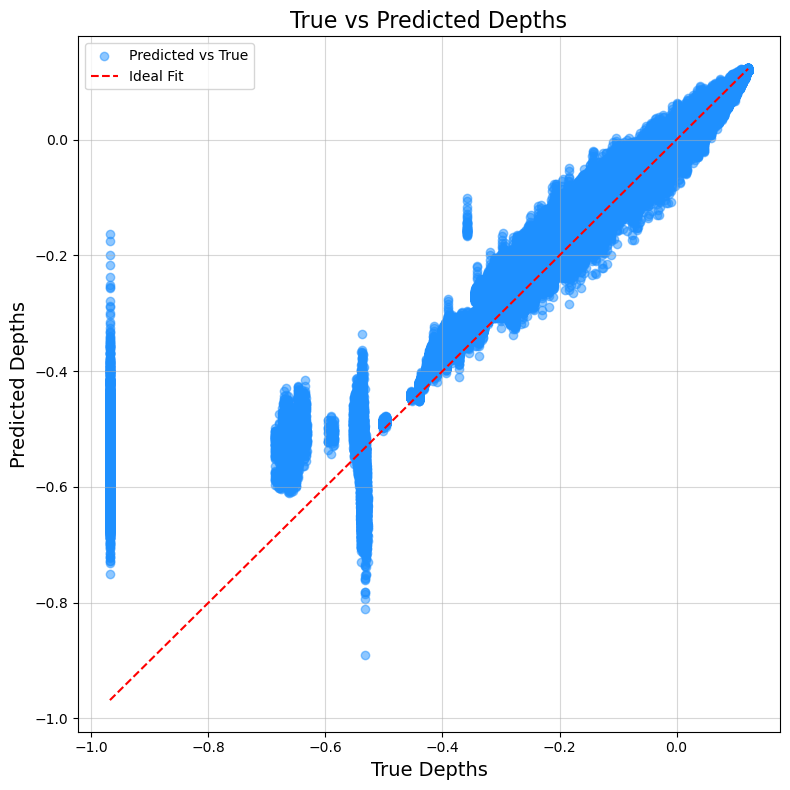

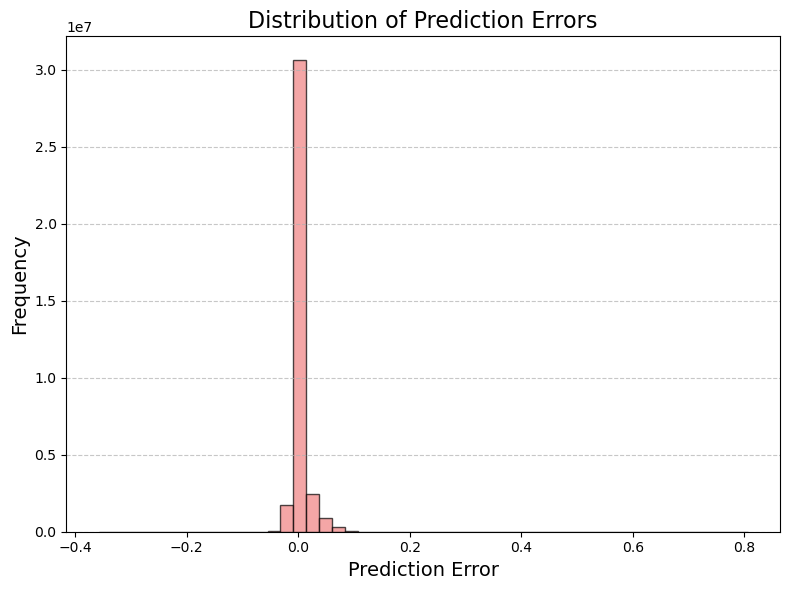

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(true_depths, predicted_depths, alpha=0.5, color='dodgerblue', label='Predicted vs True')
plt.plot([true_depths.min(), true_depths.max()], [true_depths.min(), true_depths.max()], 'r--', label='Ideal Fit')
plt.xlabel("True Depths", fontsize=14)
plt.ylabel("Predicted Depths", fontsize=14)
plt.title("True vs Predicted Depths", fontsize=16)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

errors = predicted_depths - true_depths
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel("Prediction Error", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Prediction Errors", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()